# 1.Loading Data

In [1]:
#importing basic libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#loading data
df=pd.read_csv("train.csv")
df.head()

,id,Time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,...,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,Transaction_Amount,IsFraud
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


# 2.Data Cleaning and EDA

In [3]:
#checking for null values
df.isna().sum()

id                    0
Time                  0
feat1                 0
feat2                 0
feat3                 0
feat4                 0
feat5                 0
feat6                 0
feat7                 0
feat8                 0
feat9                 0
feat10                0
feat11                0
feat12                0
feat13                0
feat14                0
feat15                0
feat16                0
feat17                0
feat18                0
feat19                0
feat20                0
feat21                0
feat22                0
feat23                0
feat24                0
feat25                0
feat26                0
feat27                0
feat28                0
Transaction_Amount    0
IsFraud               0
dtype: int64

In [4]:
df.set_index('id',inplace=True)

In [5]:
df.shape

(150000, 31)

In [6]:
df[df['IsFraud']==0].shape,df[df['IsFraud']==1].shape

((149731, 31), (269, 31))

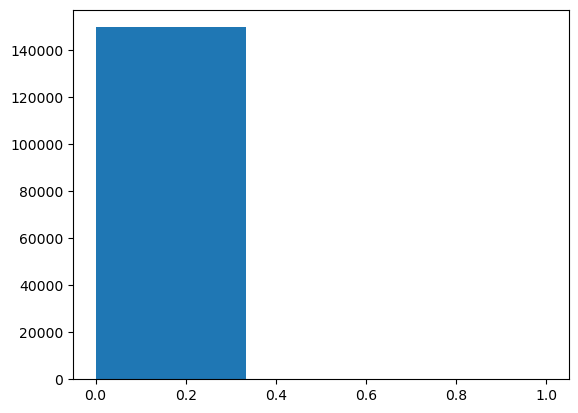

In [7]:
#count of both labels
plt.hist(df['IsFraud'],bins=3)
plt.show()

In [8]:
#correlation for feature selection
df.corr()

,Time,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,Transaction_Amount,IsFraud
Time,1.000000,-0.093390,-0.032434,0.020427,-0.008630,-0.013786,0.094831,-0.032191,0.073138,-0.252010,...,0.042830,0.031199,-0.037186,-0.028827,0.022992,-0.006494,0.007179,0.016013,0.057409,-0.004219
feat1,-0.093390,1.000000,-0.243961,-0.186476,0.033262,-0.139411,0.079780,-0.211592,-0.097640,0.062942,...,-0.087822,-0.058686,-0.095346,-0.040586,0.356753,0.009647,0.024649,0.085912,-0.135757,-0.034611
feat2,-0.032434,-0.243961,1.000000,0.058352,0.162886,0.248155,-0.069224,0.285752,0.042055,0.011613,...,-0.096351,-0.022915,0.032667,0.000850,-0.180892,-0.037889,0.060877,-0.013817,-0.582209,0.000131
feat3,0.020427,-0.186476,0.058352,1.000000,0.059863,-0.158550,-0.171302,0.088976,-0.070721,0.081873,...,0.052435,0.267803,0.037941,0.004198,-0.275304,0.012949,0.062174,-0.021181,-0.180904,-0.050245
feat4,-0.008630,0.033262,0.162886,0.059863,1.000000,0.025408,-0.013784,0.119334,0.003075,0.202727,...,0.054913,0.057307,-0.016118,-0.044552,0.039764,-0.077354,0.009951,0.034079,0.062144,0.023601
feat5,-0.013786,-0.139411,0.248155,-0.158550,0.025408,1.000000,0.341636,0.227215,0.073911,-0.028051,...,-0.073891,-0.144526,-0.009720,0.036089,0.013713,-0.044011,0.029793,-0.044181,-0.323241,0.007818
feat6,0.094831,0.079780,-0.069224,-0.171302,-0.013784,0.341636,1.000000,-0.205702,0.271744,0.092249,...,0.008036,-0.000403,-0.042657,0.068759,0.112004,0.001212,0.017102,0.011998,0.081595,0.000429
feat7,-0.032191,-0.211592,0.285752,0.088976,0.119334,0.227215,-0.205702,1.000000,-0.135444,-0.039331,...,-0.000208,-0.112496,-0.016488,-0.017244,-0.170524,-0.031643,-0.063050,0.015844,0.213182,-0.019354
feat8,0.073138,-0.097640,0.042055,-0.070721,0.003075,0.073911,0.271744,-0.135444,1.000000,0.037761,...,0.054925,0.034373,0.019036,0.031119,-0.037444,0.009673,0.033383,-0.005352,-0.087910,-0.024652
feat9,-0.252010,0.062942,0.011613,0.081873,0.202727,-0.028051,0.092249,-0.039331,0.037761,1.000000,...,-0.008085,0.042930,-0.033083,-0.000511,0.094723,0.141151,0.006989,-0.025187,-0.006079,0.010629


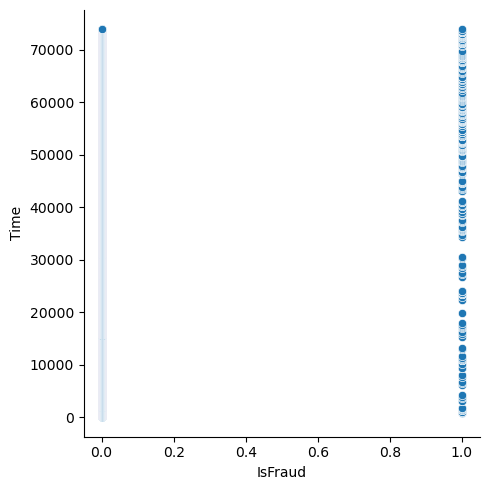

In [9]:
#plotting relative plots
sns.relplot(x=df['IsFraud'],y=df['Time'])

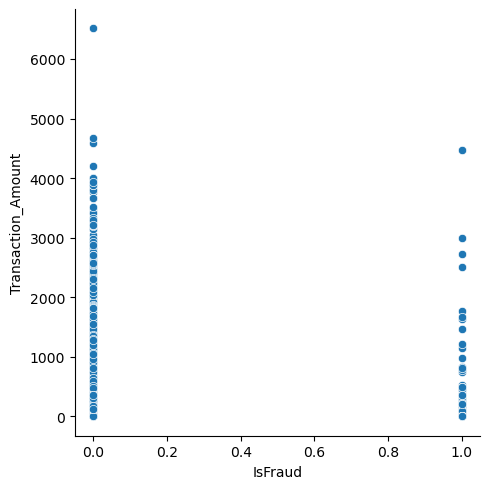

In [10]:
sns.relplot(x=df['IsFraud'],y=df['Transaction_Amount'])

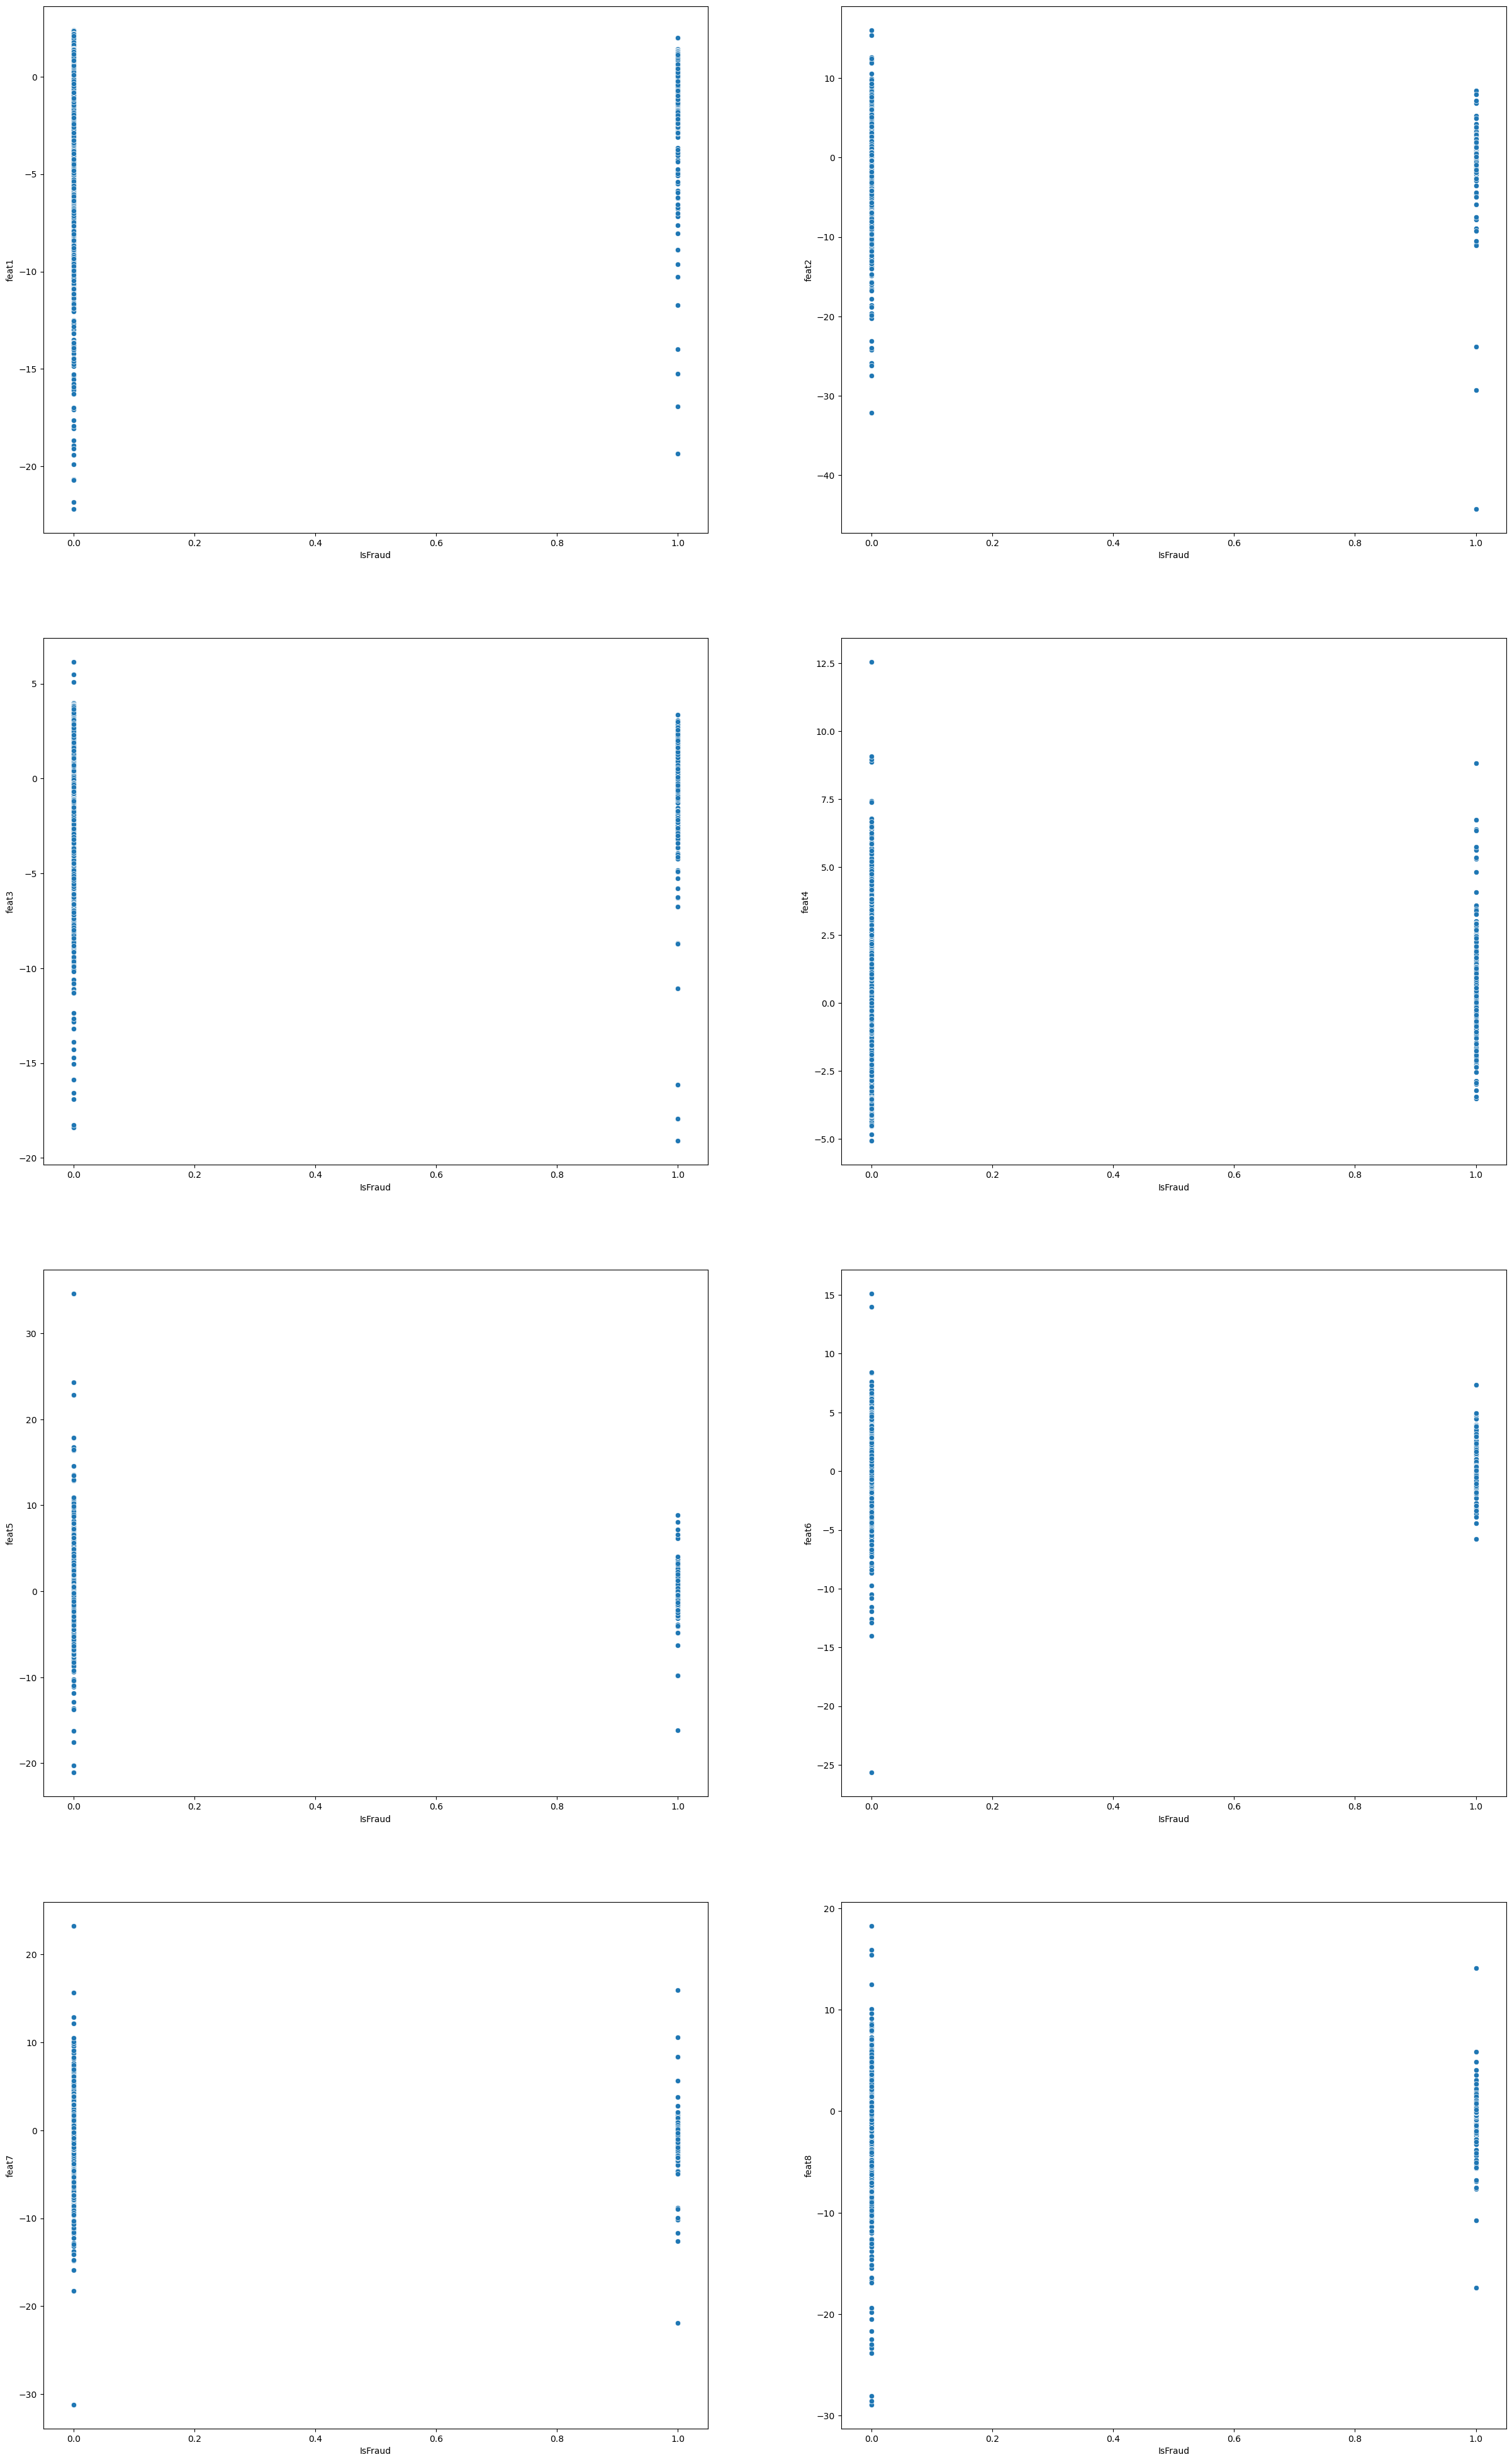

In [11]:
fig,axes=plt.subplots(nrows=4,ncols=2,figsize=(30,50))
for i in range(1,9):
    x=(int)((i-1)/2)
    y=(int)((i-1)%2)
    sns.scatterplot(x='IsFraud',y=f'feat{i}',data=df,ax=axes[x][y])
plt.show()    

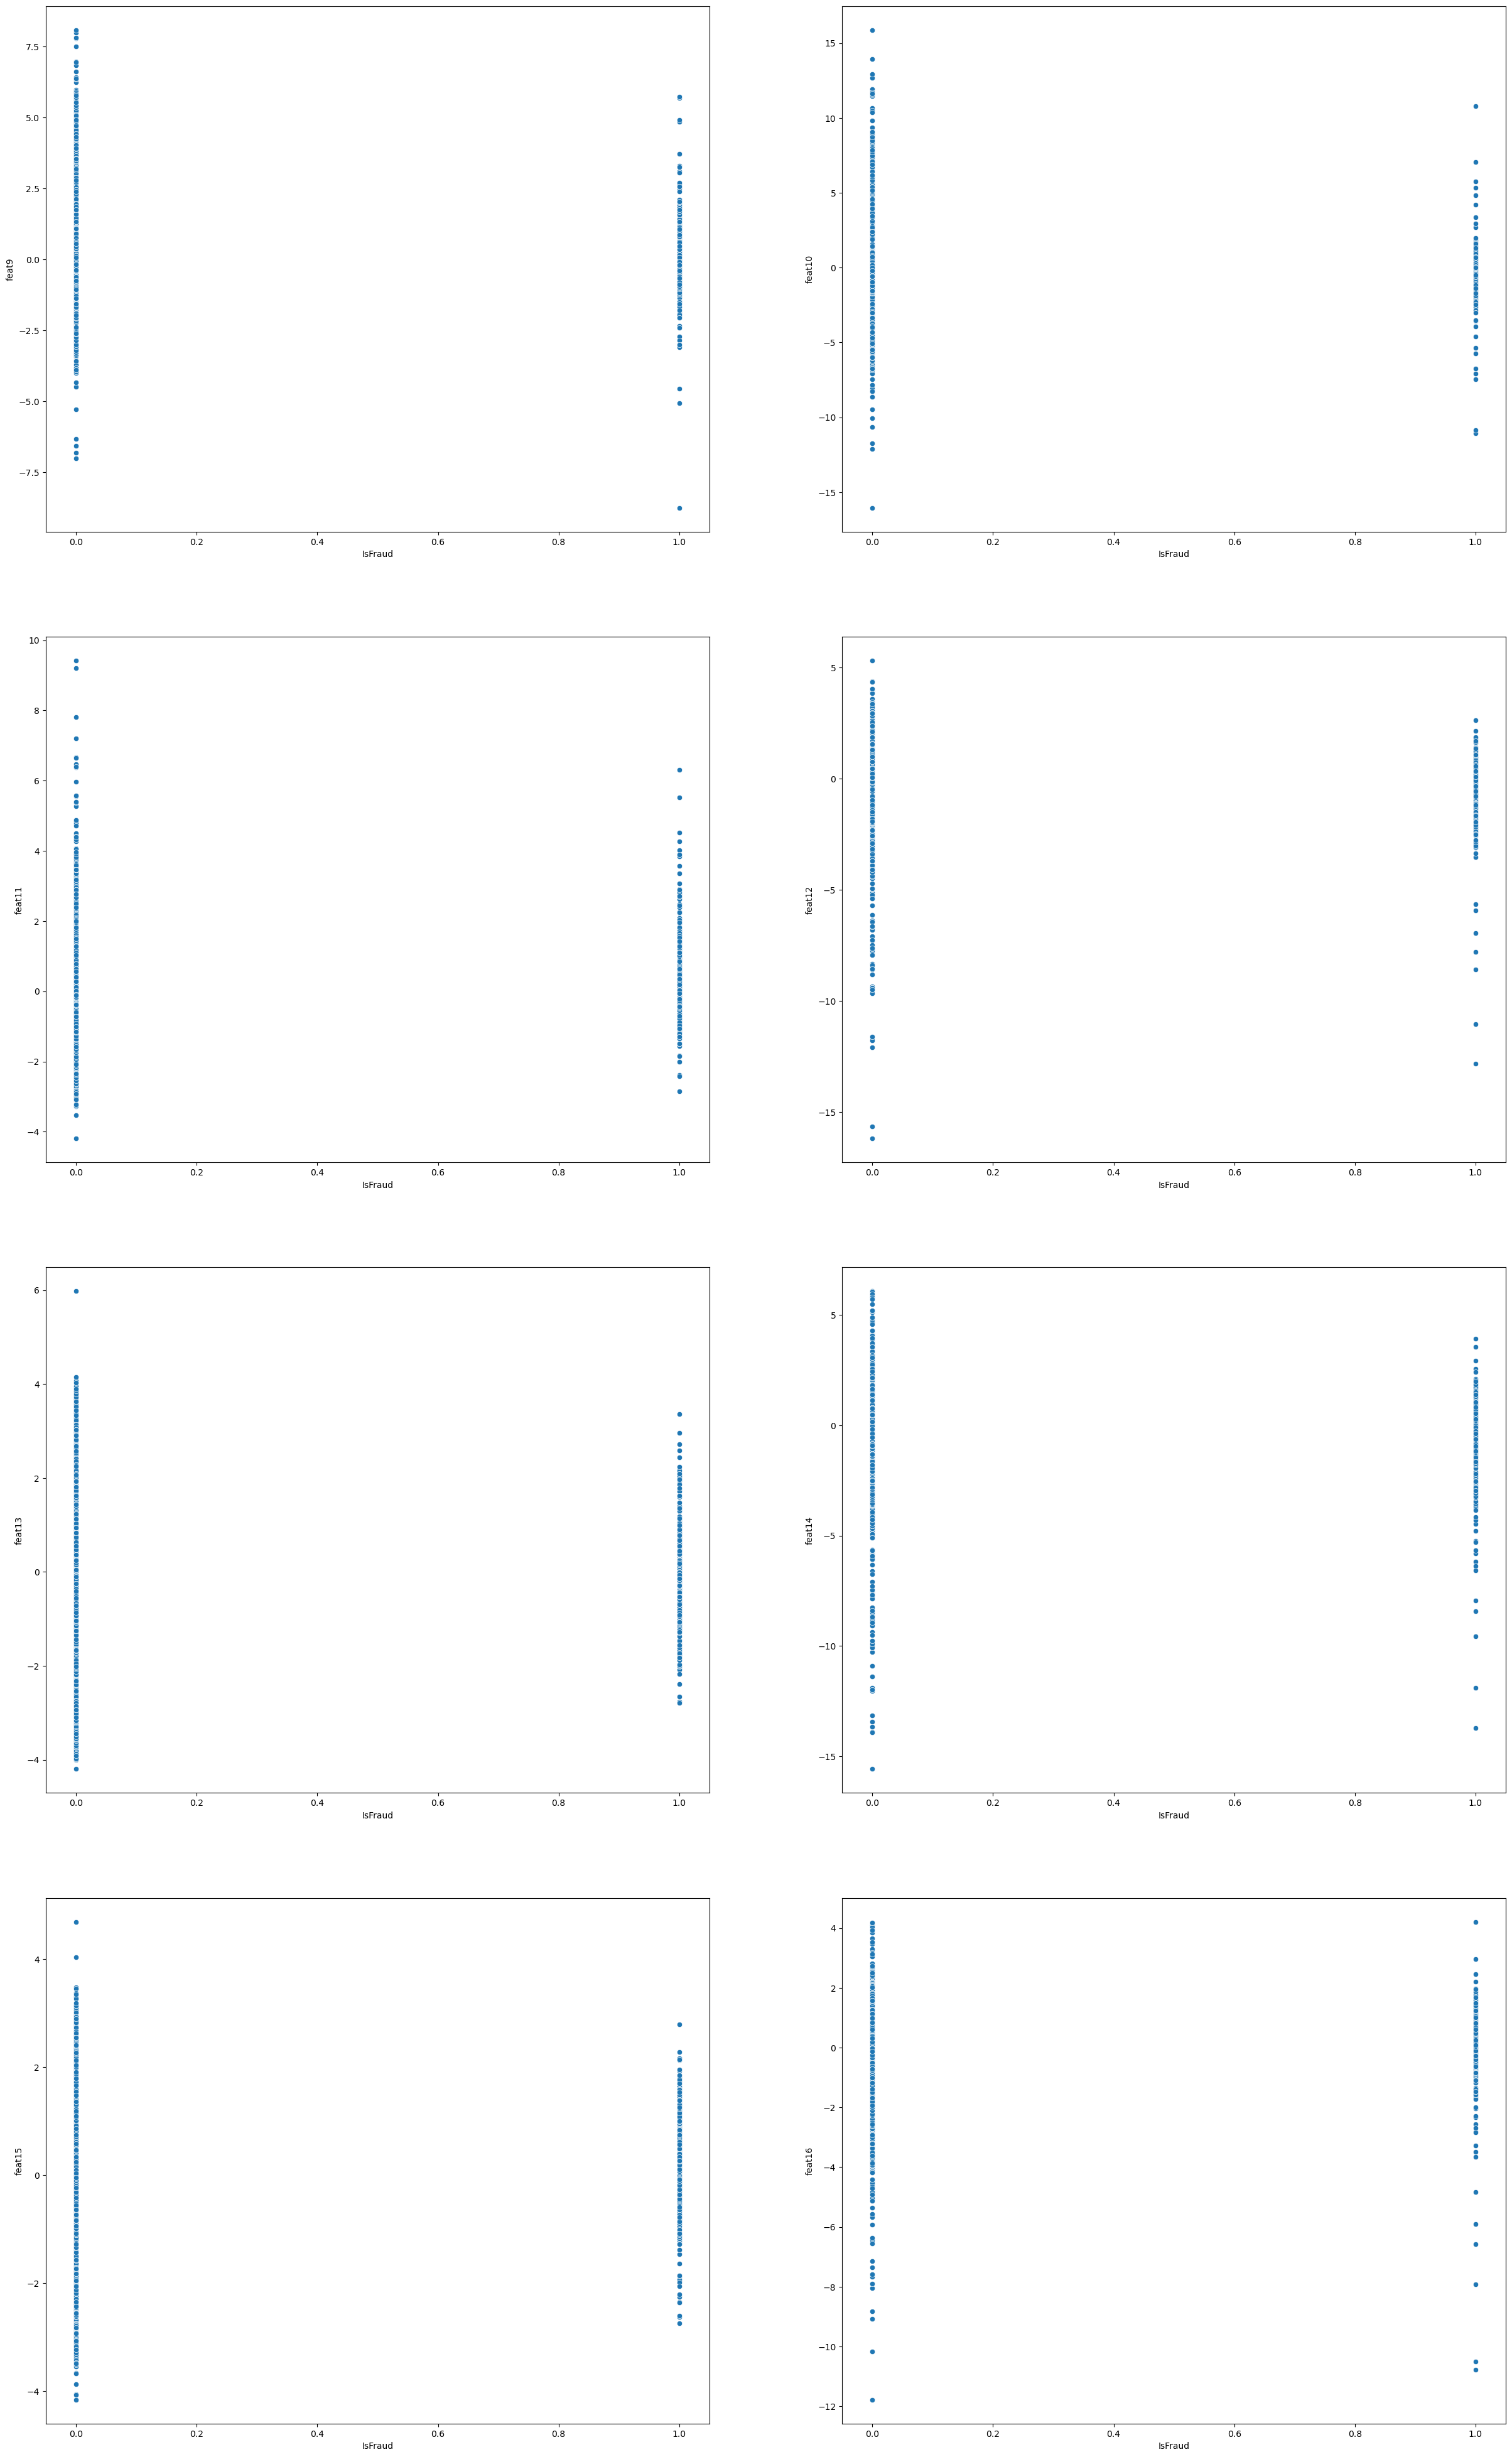

In [12]:
fig,axes=plt.subplots(nrows=4,ncols=2,figsize=(30,50))
for i in range(9,17):
    x=(int)((i-9)/2)
    y=(int)((i-9)%2)
    sns.scatterplot(x='IsFraud',y=f'feat{i}',data=df,ax=axes[x][y])
plt.show()    

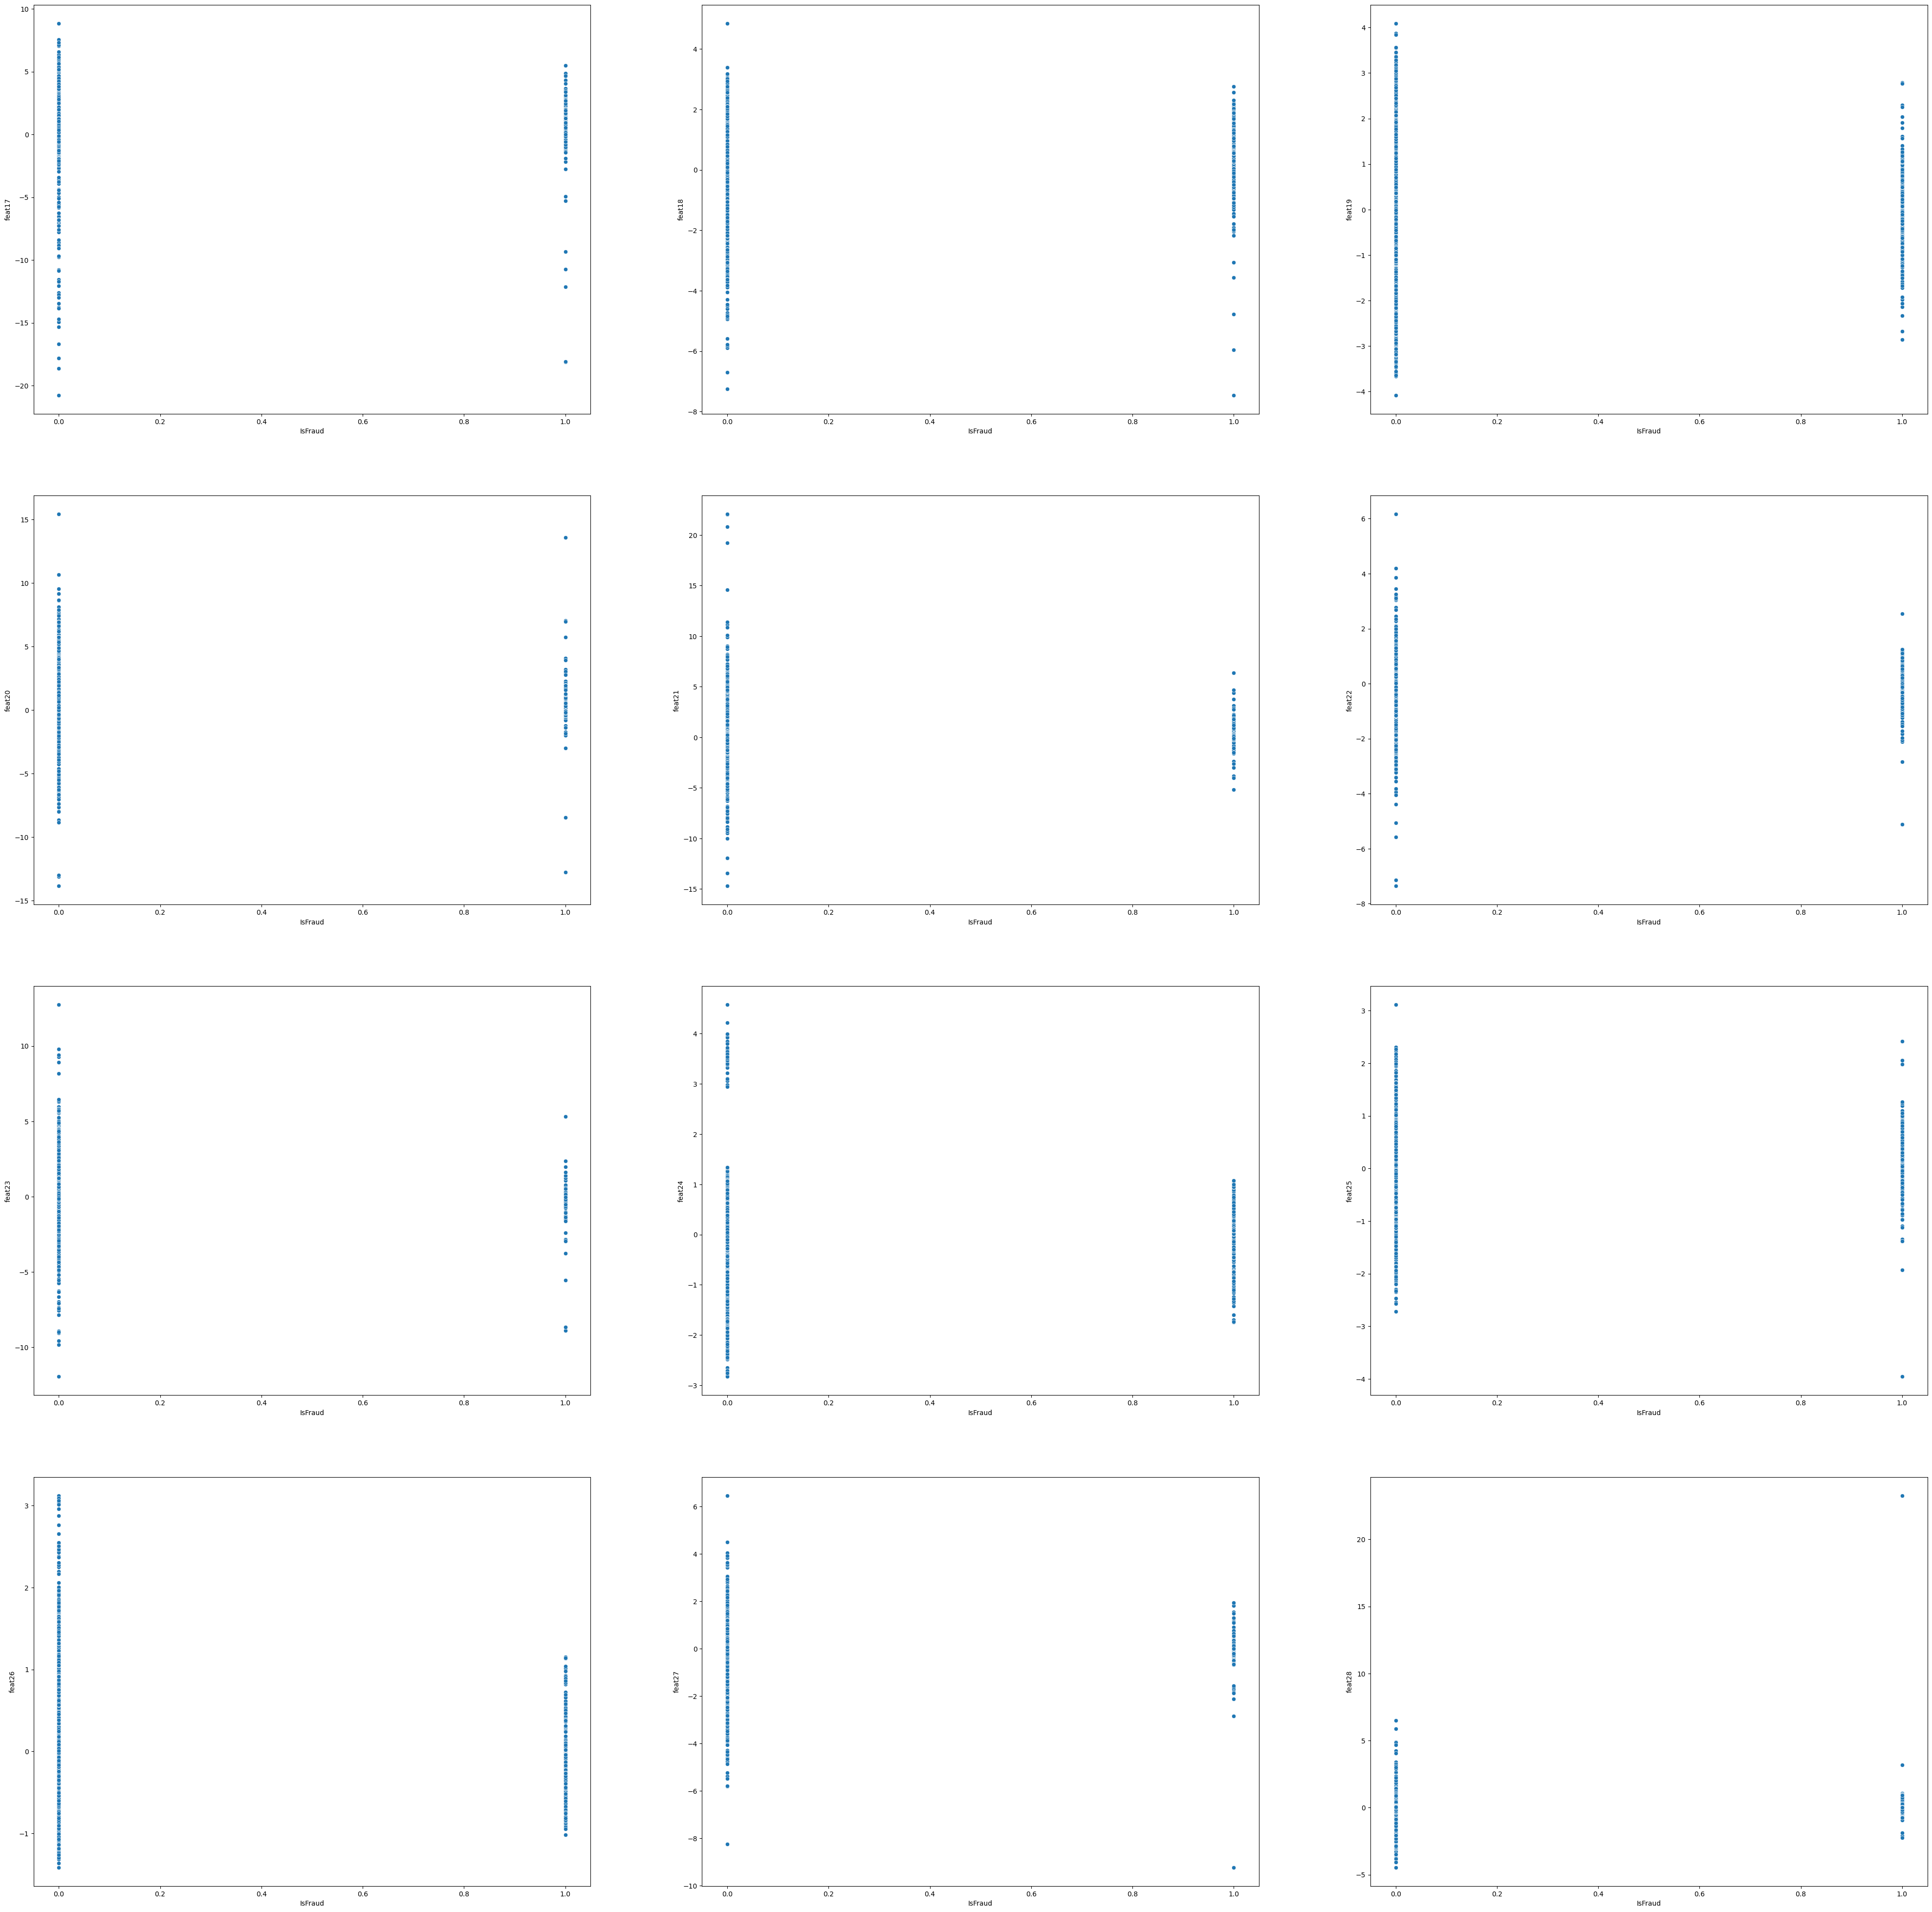

In [13]:
fig,axes=plt.subplots(nrows=4,ncols=3,figsize=(50,50))
for i in range(17,29):
    x=(int)((i-17)/3)
    y=(int)((i-17)%3)
    sns.scatterplot(x='IsFraud',y=f'feat{i}',data=df,ax=axes[x][y])
plt.show()    

# 3.Data Preprocessing

In [14]:
#dropping columns
df.drop(columns=['Time','feat2','feat6','feat13','feat25'],inplace=True)

In [15]:
import imblearn

In [16]:
#oversampling the imbalanced data
from imblearn.over_sampling import RandomOverSampler
oversample=RandomOverSampler(sampling_strategy=0.67)

In [17]:
X=df.drop(columns='IsFraud')
Y=df['IsFraud']

In [18]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X=scale.fit_transform(X)

In [19]:
#priciple component analysis for better features
from sklearn.decomposition import PCA
pca=PCA(n_components=20)

In [20]:
X=pca.fit_transform(X)

In [21]:
X=pd.DataFrame(X)

In [22]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.041286,-0.010862,0.037792,-0.030487,-0.081793,-0.007822,-0.016307,-0.109002,-0.043930,0.007390,0.062308,-0.020530,0.007378,-0.025337,-0.015654,0.009676,0.001994,0.007927,-0.012022,0.012110
1,-0.103939,0.064551,0.084397,-0.034685,0.102967,-0.002293,-0.075266,-0.080705,-0.034623,0.059699,-0.004503,-0.038735,0.010168,-0.002108,0.009998,0.027284,-0.005354,0.009913,0.002030,0.005454
2,0.023437,-0.001285,-0.049085,0.126684,-0.045233,-0.047168,-0.007758,-0.034672,-0.017872,0.021311,0.045553,-0.037758,-0.001223,0.039741,-0.024127,-0.029442,-0.000571,-0.012383,-0.005260,0.013512
3,0.003040,0.134070,0.024970,-0.000866,0.026048,0.049549,-0.015345,-0.087748,-0.028057,-0.044908,0.028094,-0.037463,0.037512,-0.040953,-0.022360,0.005733,0.008462,0.007389,-0.011533,0.008819
4,-0.044278,0.008844,-0.124501,-0.055905,0.029930,0.088741,-0.047326,-0.006675,0.002291,-0.035168,-0.049132,-0.035931,-0.003481,-0.013266,-0.009208,0.009624,-0.007036,0.001875,0.010803,-0.002202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,-0.083650,-0.111993,0.013801,-0.130007,-0.057771,0.010464,0.049057,-0.057322,-0.022824,0.042169,-0.010551,-0.030688,0.025048,0.056524,-0.023403,-0.025874,-0.002696,-0.003107,-0.009182,0.002281
149996,-0.114904,0.029330,0.059771,0.069126,0.004218,-0.034457,-0.126237,-0.006597,-0.049648,0.029037,0.001161,-0.020094,0.011410,0.015451,0.055186,0.011152,-0.005009,0.002157,-0.002406,0.000623
149997,-0.080178,-0.122825,-0.126415,-0.057479,0.068113,0.105847,-0.052726,0.015498,0.002963,-0.020701,-0.038170,-0.021576,0.014068,-0.028103,0.005336,0.003488,0.004274,-0.001163,0.007224,-0.004768
149998,0.182812,0.132146,0.231316,0.100445,-0.158611,0.098626,0.026007,0.057057,0.030900,-0.069537,-0.107362,0.053375,0.049712,0.039611,0.020874,0.005344,-0.018374,-0.001304,0.012995,0.010613


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=7)

In [25]:
x_train,y_train=oversample.fit_resample(x_train,y_train)

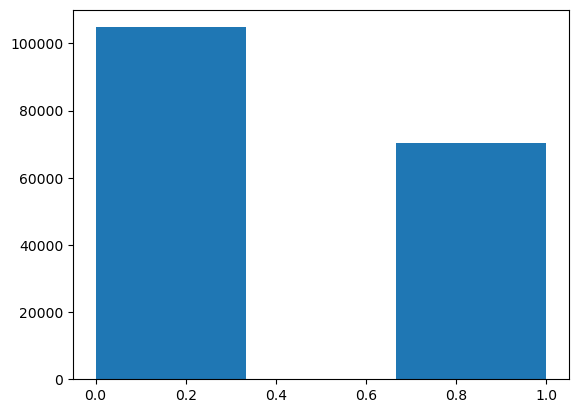

In [26]:
plt.hist(y_train,bins=3)
plt.show()

In [27]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((175062, 20), (45000, 20), (175062,), (45000,))

# 4.Model selection 

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score,accuracy_score,precision_score,confusion_matrix,accuracy_score,precision_score
gn=GaussianNB()
gn.fit(x_train,y_train)
y_pred=gn.predict(x_test)
roc_auc_score(y_test,y_pred),confusion_matrix(y_test,y_pred),accuracy_score(y_pred,y_test),precision_score(y_pred,y_test)

(0.6695537987841375,
 array([[43002,  1901],
        [   60,    37]], dtype=int64),
 0.9564222222222222,
 0.38144329896907214)

In [29]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred1=lr.predict(x_test)
roc_auc_score(y_test,y_pred1),confusion_matrix(y_test,y_pred1),accuracy_score(y_pred1,y_test),precision_score(y_pred1,y_test)

(0.7235444053401707,
 array([[40444,  4459],
        [   44,    53]], dtype=int64),
 0.8999333333333334,
 0.5463917525773195)

In [30]:
#we can see that from auc score from logistic regression is better but accuracy is decreased

In [31]:
'''
dfs=pd.read_csv('test.csv')
dfs1=dfs.set_index('id')
dfs1.drop(columns=['Time','feat2','feat6','feat13','feat25'],inplace=True)
dfs1=scale.fit_transform(dfs1)
dfs1=pca.fit_transform(dfs1)
y_preds=lr.predict(dfs1)
dfs['IsFraud']=y_preds
dfs=dfs[['id','IsFraud']]
dfs.to_csv('sample_submission.csv',index=False)
'''

"\ndfs=pd.read_csv('test.csv')\ndfs1=dfs.set_index('id')\ndfs1.drop(columns=['Time','feat2','feat6','feat13','feat25'],inplace=True)\ndfs1=scale.fit_transform(dfs1)\ndfs1=pca.fit_transform(dfs1)\ny_preds=lr.predict(dfs1)\ndfs['IsFraud']=y_preds\ndfs=dfs[['id','IsFraud']]\ndfs.to_csv('sample_submission.csv',index=False)\n"

# 5.Performance analysis

<Axes: >

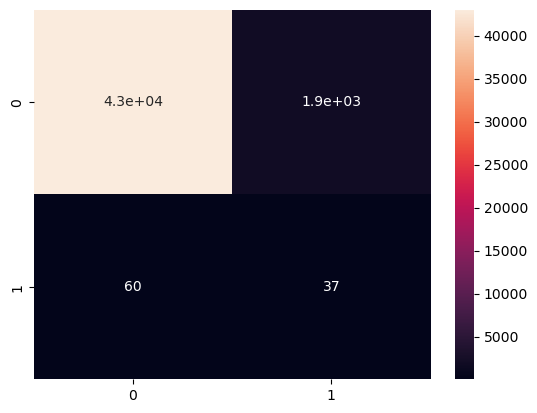

In [32]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

<Axes: >

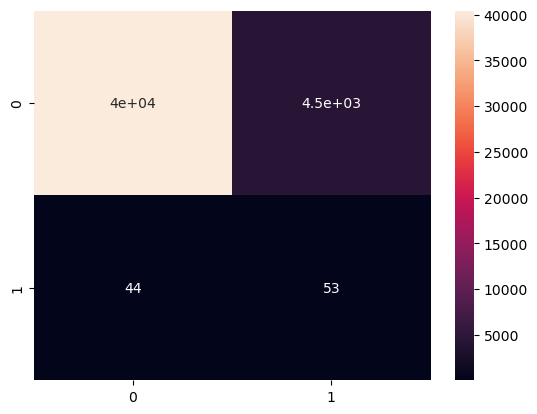

In [33]:
sns.heatmap(confusion_matrix(y_test,y_pred1), annot=True)

In [34]:
df_plot=[]
df_plot=pd.DataFrame(df_plot)

In [35]:
df_plot['actual_value']=y_test
df_plot['naive_bayes']=y_pred
df_plot['logistic_regression']=y_pred1

In [36]:
df_plot

,actual_value,naive_bayes,logistic_regression
id,,,
40217,0,0,0
27187,0,0,0
1253,0,0,0
24630,0,0,0
126102,0,0,0
...,...,...,...
90436,0,0,0
33193,0,0,0
108096,0,0,0


In [37]:
df_plot.reset_index(inplace=True)

In [38]:
df_plot.drop(columns='id',inplace=True)

<Axes: >

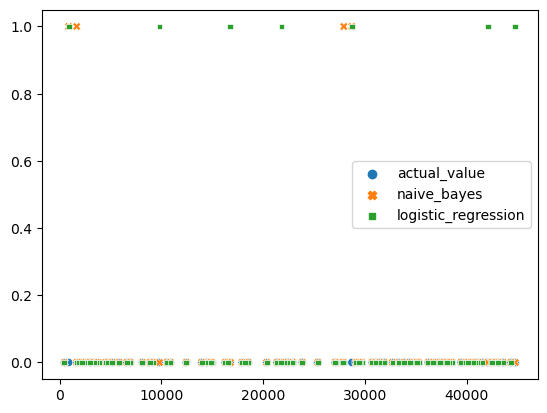

In [39]:
sns.scatterplot(df_plot[df_plot['actual_value']==0].sample(100))

<Axes: >

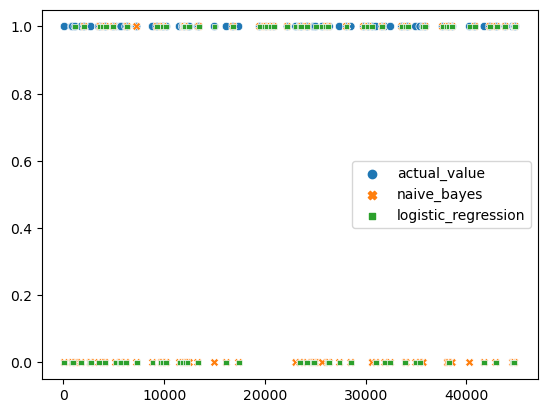

In [40]:
sns.scatterplot(df_plot[df_plot['actual_value']==1])